# Ejercicio 2

Teniendo la función

$$f(x) = 0.01x + (\sin(x)^2) \times (\sin(4x)^2) \times (0.5\phi(x))$$

donde $\phi$ es la función de densidad de probabilidad normal estándar evaluada en $x$.

1. Implementar $f(x)$.
2. Obtener 500 muestras de la función $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.
3. Teniendo dichas muestras, graficar $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.
4. Dividir el conjunto total $(x,f(x))$ en un subconjunto de entrenamiento del 70% de las muestras y un subconjunto de test del 30% de las muestras.
5. Usar el subconjunto de entrenamiento para entrenar un modelo de regresión lineal para aproximar $f(x)$ en el mencionado intervalo.
6. Mostrar gráficamente la regresión para el conjunto de entrenamiento y para el conjunto de test.
7. Imprimir el error cuadrático medio para las predicciones sobre los $X$ de entrenamiento y los $X$ de test.

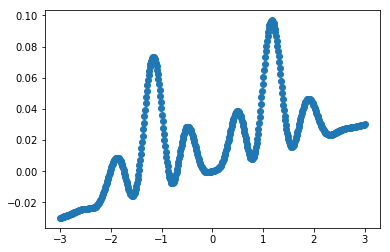

In [5]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Obtenemos 500 muestras de la función f(x) en el intervalo de x=[-3 <= x <= 3].
x = np.linspace(-3, 3, 500)

# Importo libreria para la función densidad de probabilidad.
from scipy.stats import norm

# Implementacion f(x)
y = 0.01*x + ((np.sin(x)**2) * (np.sin(4*x)**2) * ((0.5)*norm.pdf(x)))

# Teniendo dichas muestras, graficamos f(x) en el intervalo de x=[-3 <= x <= 3].
plt.plot(x, y, 'o');

In [6]:
# Definimos los ejemplos (X) como un array bi-dimensional de numpy
X = x[:, np.newaxis]
X

array([[-3.        ],
       [-2.98797595],
       [-2.9759519 ],
       [-2.96392786],
       [-2.95190381],
       [-2.93987976],
       [-2.92785571],
       [-2.91583166],
       [-2.90380762],
       [-2.89178357],
       [-2.87975952],
       [-2.86773547],
       [-2.85571142],
       [-2.84368737],
       [-2.83166333],
       [-2.81963928],
       [-2.80761523],
       [-2.79559118],
       [-2.78356713],
       [-2.77154309],
       [-2.75951904],
       [-2.74749499],
       [-2.73547094],
       [-2.72344689],
       [-2.71142285],
       [-2.6993988 ],
       [-2.68737475],
       [-2.6753507 ],
       [-2.66332665],
       [-2.65130261],
       [-2.63927856],
       [-2.62725451],
       [-2.61523046],
       [-2.60320641],
       [-2.59118236],
       [-2.57915832],
       [-2.56713427],
       [-2.55511022],
       [-2.54308617],
       [-2.53106212],
       [-2.51903808],
       [-2.50701403],
       [-2.49498998],
       [-2.48296593],
       [-2.47094188],
       [-2

In [7]:
# Dividimos el dataset 
# subconjunto de entrenamiento 70% de las muestras y un subconjunto de test 30% de las muestras.
X_train = X[0:350]
X_test = X[350:500]
y_train = y[0:350]
y_test = y[350:500]

In [8]:
# Usamos el subconjunto de entrenamiento para entrenar un modelo de regresión lineal 
# para aproximar f(x) en el mencionado intervalo.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Tras adaptar el modelo a los datos, acabamos de obtener el siguiente modelo de regresión lineal
# con los presentes valores

print('Weight coefficients (beta_1): ', regressor.coef_)
print('y-axis intercept (beta_0): ', regressor.intercept_)

Weight coefficients (beta_1):  [ 0.01608022]
y-axis intercept (beta_0):  0.0254445673114


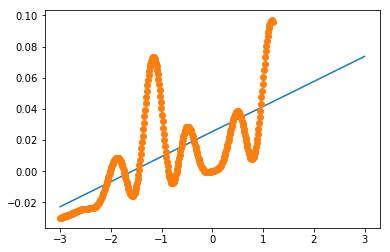

In [10]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

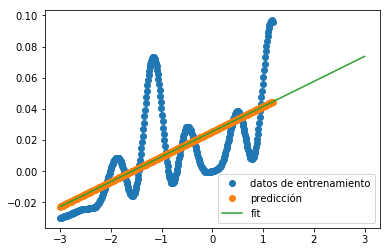

In [11]:
# Mostramos la predicción que realiza sobre el conjunto de datos de entrenamiento; esto muestra las limitaciones del modelo.

y_pred_train = regressor.predict(X_train)
plt.plot(X_train, y_train, 'o', label="datos de entrenamiento")
plt.plot(X_train, y_pred_train, 'o', label="predicción")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

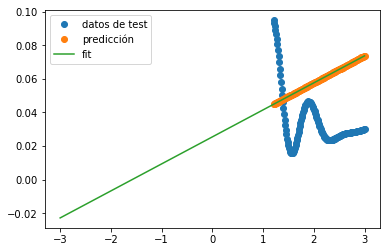

In [12]:
# Mostramos el resultado de esta misma predicción sobre el conjunto de datos de test:

y_pred_test = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="datos de test")
plt.plot(X_test, y_pred_test, 'o', label="predicción")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

In [13]:
# Veamos el error cuadrático medio para X Prueba:

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test)

0.0010926307695542973

In [14]:
# Vemos el error cuadratico medio para X Entrenamiento:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train)

0.00051508308831770097